# DigiCam: Towards High-Quality Lensless Imaging with a Low-Cost Programmable Mask

In this notebook, we visualize results for the paper "DigiCam: Towards High-Quality Lensless Imaging with a Low-Cost Programmable Mask"

In [1]:
from lensless.recon.model_dict import model_dict, download_model

CAMERA = "digicam"
DATASET = "celeba_26k"

models_dict = model_dict[CAMERA][DATASET]

/home/bezzam/anaconda3/envs/lensless/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Section 4.1 (ADMM, measured vs. simulated PSF)

The purpose of this experiment is to show that it is equivalent to use a measured PSF or a simulated PSF for image reconstruction with DigiCam. In both cases, reconstructions are done on a **measured** dataset.

In [2]:
from pprint import pprint
import os, json


model_paths = {
    "Measured PSF": "admm_measured_psf",
    "Simulated PSF": "admm_simulated_psf",
}

# set model paths (and download if necessary)
for _model in model_paths.keys():

    model_key= model_paths[_model]
    # overwrite with model path
    model_paths[_model] = download_model(camera=CAMERA, dataset=DATASET, model=model_key)

print("MODEL PATHS:")
pprint(model_paths)

"""
Print desired metrics.
"""
selected_iterations = [100, 10]    # [10, 20, 100]
selected_metrics = ["PSNR", "SSIM", "LPIPS_Vgg"]

for key, value in model_paths.items():

    print("-" * 80)
    print(f"{key}")
    print("-" * 80)

    _results_path = os.path.join(value, "results.json")
    assert os.path.exists(_results_path), f"Path {_results_path} does not exist"
    _test_metrics = json.load(open(_results_path))["ADMM"]

    for iteration in selected_iterations:
        print(f"{iteration} iterations")
        print("-" * 20)
        for metric in selected_metrics:
            print(f"{metric}: {_test_metrics[str(iteration)][metric]:.3}")
        print("\n")

MODEL PATHS:
{'Measured PSF': '/home/bezzam/LenslessPiCam/lensless/recon/../../models/digicam/celeba_26k/admm_measured_psf',
 'Simulated PSF': '/home/bezzam/LenslessPiCam/lensless/recon/../../models/digicam/celeba_26k/admm_simulated_psf'}
--------------------------------------------------------------------------------
Measured PSF
--------------------------------------------------------------------------------
100 iterations
--------------------
PSNR: 9.31
SSIM: 0.292
LPIPS_Vgg: 0.698


10 iterations
--------------------
PSNR: 8.7
SSIM: 0.221
LPIPS_Vgg: 0.746


--------------------------------------------------------------------------------
Simulated PSF
--------------------------------------------------------------------------------
100 iterations
--------------------
PSNR: 9.98
SSIM: 0.343
LPIPS_Vgg: 0.746


10 iterations
--------------------
PSNR: 9.3
SSIM: 0.27
LPIPS_Vgg: 0.78




In [3]:
# TODO: reconstructions and show how PSF is simulated

## Section 4.2 (Physics-based machine learning)

The purpose of this experiment is to show that the physics-based machine learning reconstructions (with a simulated PSF) can improve image quality compared to the ADMM reconstructions. We use the same **measured dataset** as in the previous experiment.

In [4]:
from pprint import pprint
from matplotlib import pyplot as plt
import os
import json
import numpy as np


model_paths = {
    "US10": "unrolled_admm10",
    "FUS10": "unrolled_admm10_ft_psf",
    "U-Net": "unet8M",
    "US10+P8": "unrolled_admm10_post8M",
    "FUS10+P8": "unrolled_admm10_ft_psf_post8M",
    "P8+US10": "pre8M_unrolled_admm10",
    "P4+US10+P4": "pre4M_unrolled_admm10_post4M",
    "P4+FUS10+P4": "pre4M_unrolled_admm10_ft_psf_post4M",
}

# set model paths (and download if necessary)
for _model in model_paths.keys():
    model_key= model_paths[_model]
    # overwrite with model path
    model_paths[_model] = download_model(camera=CAMERA, dataset=DATASET, model=model_key)

print("MODEL PATHS:")
pprint(model_paths)

MODEL PATHS:
{'FUS10': '/home/bezzam/LenslessPiCam/lensless/recon/../../models/digicam/celeba_26k/unrolled_admm10_ft_psf',
 'FUS10+P8': '/home/bezzam/LenslessPiCam/lensless/recon/../../models/digicam/celeba_26k/unrolled_admm10_ft_psf_post8M',
 'P4+FUS10+P4': '/home/bezzam/LenslessPiCam/lensless/recon/../../models/digicam/celeba_26k/pre4M_unrolled_admm10_ft_psf_post4M',
 'P4+US10+P4': '/home/bezzam/LenslessPiCam/lensless/recon/../../models/digicam/celeba_26k/pre4M_unrolled_admm10_post4M',
 'P8+US10': '/home/bezzam/LenslessPiCam/lensless/recon/../../models/digicam/celeba_26k/pre8M_unrolled_admm10',
 'U-Net': '/home/bezzam/LenslessPiCam/lensless/recon/../../models/digicam/celeba_26k/unet8M',
 'US10': '/home/bezzam/LenslessPiCam/lensless/recon/../../models/digicam/celeba_26k/unrolled_admm10',
 'US10+P8': '/home/bezzam/LenslessPiCam/lensless/recon/../../models/digicam/celeba_26k/unrolled_admm10_post8M'}



-- US10 --
Best epoch (chosen from test loss): 23 / 25
PSNR: 8.63
SSIM: 0.293
LPIPS_Vgg: 0.671
Best test loss: 0.81

-- FUS10 --
Best epoch (chosen from test loss): 24 / 25
PSNR: 11.6
SSIM: 0.434
LPIPS_Vgg: 0.623
Best test loss: 0.693

-- U-Net --
Best epoch (chosen from test loss): 23 / 25
PSNR: 17.8
SSIM: 0.595
LPIPS_Vgg: 0.364
Best test loss: 0.381

-- US10+P8 --
Best epoch (chosen from test loss): 23 / 25
PSNR: 19.8
SSIM: 0.658
LPIPS_Vgg: 0.331
Best test loss: 0.341

-- FUS10+P8 --
Best epoch (chosen from test loss): 24 / 25
PSNR: 19.1
SSIM: 0.634
LPIPS_Vgg: 0.344
Best test loss: 0.356

-- P8+US10 --
Best epoch (chosen from test loss): 23 / 25
PSNR: 16.5
SSIM: 0.519
LPIPS_Vgg: 0.418
Best test loss: 0.44

-- P4+US10+P4 --
Best epoch (chosen from test loss): 22 / 25
PSNR: 21.6
SSIM: 0.687
LPIPS_Vgg: 0.291
Best test loss: 0.298

-- P4+FUS10+P4 --
Best epoch (chosen from test loss): 24 / 25
PSNR: 21.2
SSIM: 0.673
LPIPS_Vgg: 0.301
Best test loss: 0.309


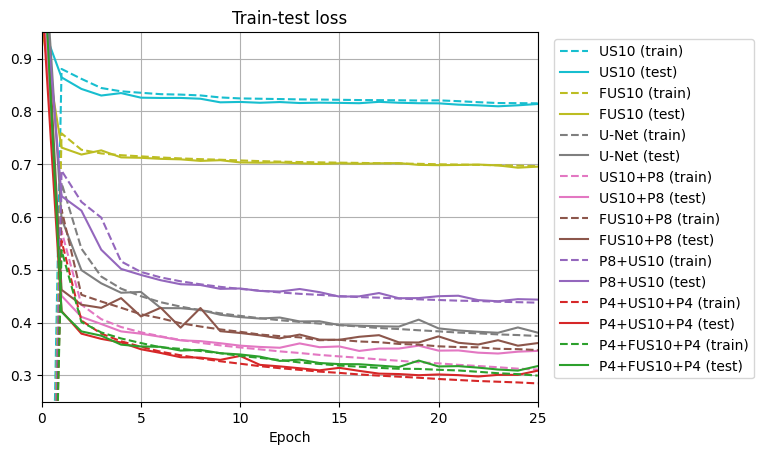

In [5]:
MAX_EPOCH = 25

# available metrics: 'LOSS', 'MSE', 'MAE', 'LPIPS_Vgg', 'LPIPS_Alex', 'PSNR', 'SSIM', 'ReconstructionError'
selected_metrics = ["PSNR", "SSIM", "LPIPS_Vgg"]

# plot train and test loss
import matplotlib.colors as mcolors
plot_colors = list(mcolors.TABLEAU_COLORS.keys())
plt.figure()
for key, value in model_paths.items():
    _metrics_path = os.path.join(value, "metrics.json")
    assert os.path.exists(_metrics_path), f"Path {_metrics_path} does not exist"
    _test_metrics = json.load(open(_metrics_path))

    color = plot_colors.pop()
    train_loss = np.array(_test_metrics["LOSS"])
    train_loss = train_loss[:MAX_EPOCH+1]
    plt.plot(train_loss, label=key + " (train)", color=color, linestyle="--")

    test_loss = np.array(_test_metrics["MSE"]) + np.array(_test_metrics["LPIPS_Vgg"])
    test_loss = test_loss[:MAX_EPOCH+1]
    plt.plot(test_loss, label=key + " (test)", linestyle="-", color=color)

    best_epoch = np.argmin(test_loss)
    print(f"\n-- {key} --")
    print(f"Best epoch (chosen from test loss): {best_epoch} / {len(test_loss)-1}")

    # print metrics
    for _metric in selected_metrics:
        print(f"{_metric}: {np.array(_test_metrics[_metric])[best_epoch]:.3}")

    print(f"Best test loss: {test_loss[best_epoch]:.3}")

plt.xlabel("Epoch")
plt.title("Train-test loss")

# legend outside
plt.legend(loc="upper right", bbox_to_anchor=(1.45, 1.0))
plt.ylim([0.25, 0.95]);
plt.xlim([0, MAX_EPOCH])
# plt.legend()
plt.legend(loc="upper right", bbox_to_anchor=(1.45, 1.0))

plt.grid()

Plot metric over iterations


PSNR
--------------------------------------------------------------------------------
Max PSNR for US10 (epoch 4): 9.15
Max PSNR for FUS10 (epoch 25): 11.6
Max PSNR for U-Net (epoch 25): 18.0
Max PSNR for US10+P8 (epoch 24): 20.1
Max PSNR for FUS10+P8 (epoch 25): 19.3
Max PSNR for P8+US10 (epoch 29): 16.8
Max PSNR for P4+US10+P4 (epoch 23): 21.8
Max PSNR for P4+FUS10+P4 (epoch 25): 21.3

SSIM
--------------------------------------------------------------------------------
Max SSIM for US10 (epoch 3): 0.329
Max SSIM for FUS10 (epoch 23): 0.436
Max SSIM for U-Net (epoch 25): 0.596
Max SSIM for US10+P8 (epoch 24): 0.66
Max SSIM for FUS10+P8 (epoch 22): 0.635
Max SSIM for P8+US10 (epoch 29): 0.525
Max SSIM for P4+US10+P4 (epoch 25): 0.688
Max SSIM for P4+FUS10+P4 (epoch 25): 0.678

LPIPS_Vgg
--------------------------------------------------------------------------------
Min LPIPS_Vgg for US10 (epoch 25): 0.669
Min LPIPS_Vgg for FUS10 (epoch 24): 0.623
Min LPIPS_Vgg for U-Net (epoch 23): 

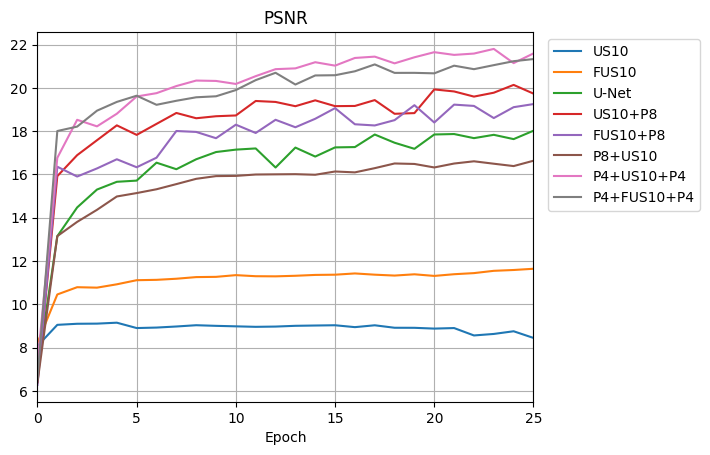

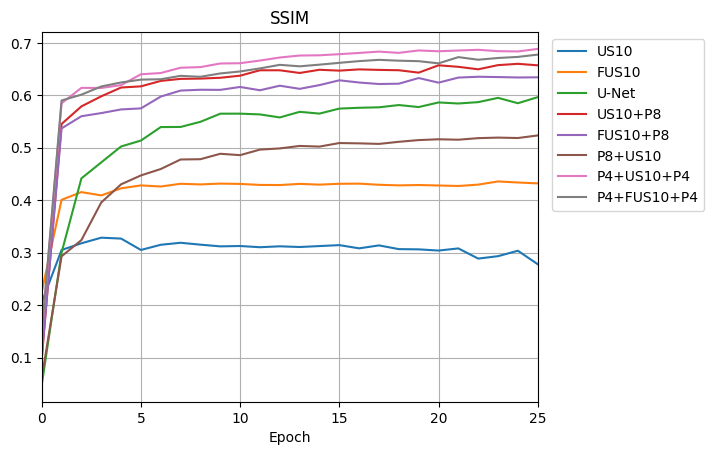

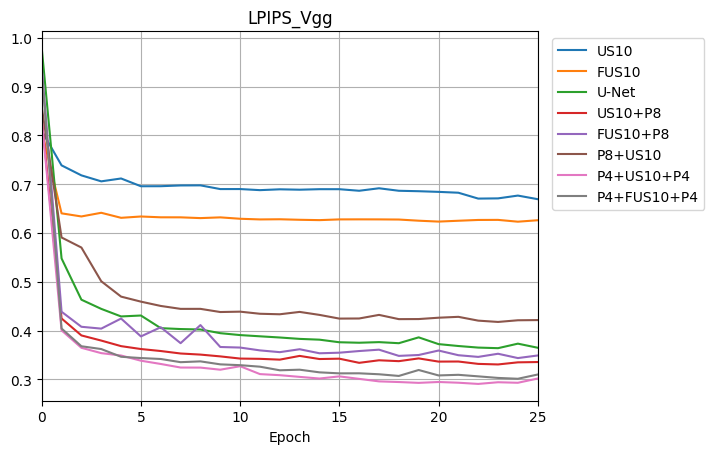

In [6]:
# metrics: 'LOSS', 'MSE', 'MAE', 'LPIPS_Vgg', 'LPIPS_Alex', 'PSNR', 'SSIM', 'ReconstructionError'
for metric in selected_metrics:
    print(f"\n{metric}")
    print("-" * 80)

    plt.figure()
    for key, value in model_paths.items():
        _metrics_path = os.path.join(value, "metrics.json")
        assert os.path.exists(_metrics_path), f"Path {_metrics_path} does not exist"
        _test_metrics = json.load(open(_metrics_path))

        _test_metrics = np.array(_test_metrics[metric])
        plt.plot(_test_metrics, label=key)

        # print three significant digits
        if metric == "PSNR" or metric == "SSIM":
            
            print(f"Max {metric} for {key} (epoch {np.argmax(_test_metrics)}): {np.max(_test_metrics):.3}")
        else:
            print(f"Min {metric} for {key} (epoch {np.argmin(_test_metrics)}): {np.min(_test_metrics):.3}")

    plt.xlabel("Epoch")
    plt.title(metric)
    plt.grid()
    plt.xlim(0, MAX_EPOCH)
    plt.legend(loc="upper right", bbox_to_anchor=(1.35, 1.0))

In [7]:
# TODO : example reconstructions

## Section 4.3 (Learning mask)

The purpose of this experiment is to jointly learn the physical mask and digital reconstruction parameters through *hardware-in-the-loop* (HITL) training. For this experiment, the data has to be re-simulated / re-measured whenever the mask pattern changes.